In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime

In [2]:
pune = pd.read_csv('preci_all.csv')
pune['system:index'] = pd.to_datetime(pune['system:index'],format='%Y%m%d%H%M%S').dt.strftime('%Y-%m-%d %H:%M:%S')
del pune['date'],pune['.geo']
pune.columns = pd.Index(['date','value'])
pune['date'] = pd.to_datetime(pune['date'])
pune.set_index("date", inplace = True)
pune1 = pune.resample('D').sum()

In [3]:
pune1 = pune1.reset_index()
pune1['Month'] = pune1['date'].dt.month
pune1['Year'] = pune1['date'].dt.year

In [4]:
'''c = 1
fig = make_subplots(rows=19, cols=1)
df = pune1[(pune1['Month'] == 6) | (pune1['Month'] == 7) | (pune1['Month'] == 8) | (pune1['Month'] == 9)]
for i in range(2001,2020):
    df = df[df['Year'] == i]
    fig.add_trace(go.Histogram(x=df['value']),row=c,col=1)
    fig.update_xaxes(title_text=str(i), row=c, col=1)
    fig.update_layout(height=5000, width=5000)
    c= c+1
fig.show()'''

"c = 1\nfig = make_subplots(rows=19, cols=1)\ndf = pune1[(pune1['Month'] == 6) | (pune1['Month'] == 7) | (pune1['Month'] == 8) | (pune1['Month'] == 9)]\nfor i in range(2001,2020):\n    df = df[df['Year'] == i]\n    fig.add_trace(go.Histogram(x=df['value']),row=c,col=1)\n    fig.update_xaxes(title_text=str(i), row=c, col=1)\n    fig.update_layout(height=5000, width=5000)\n    c= c+1\nfig.show()"

In [5]:
#fig = px.histogram(pune2, x="value",nbins=100)
#fig.show()

In [6]:
#pune2['value'].value_counts()

In [7]:
df = pune1[(pune1['Month'] == 6) | (pune1['Month'] == 7) | (pune1['Month'] == 8) | (pune1['Month'] == 9)]

In [8]:
df1 = df[df['Year'] == 2001]

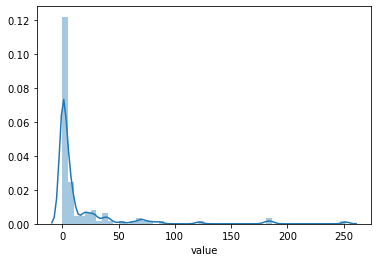

In [9]:
sns.distplot(df1["value"],bins=50)

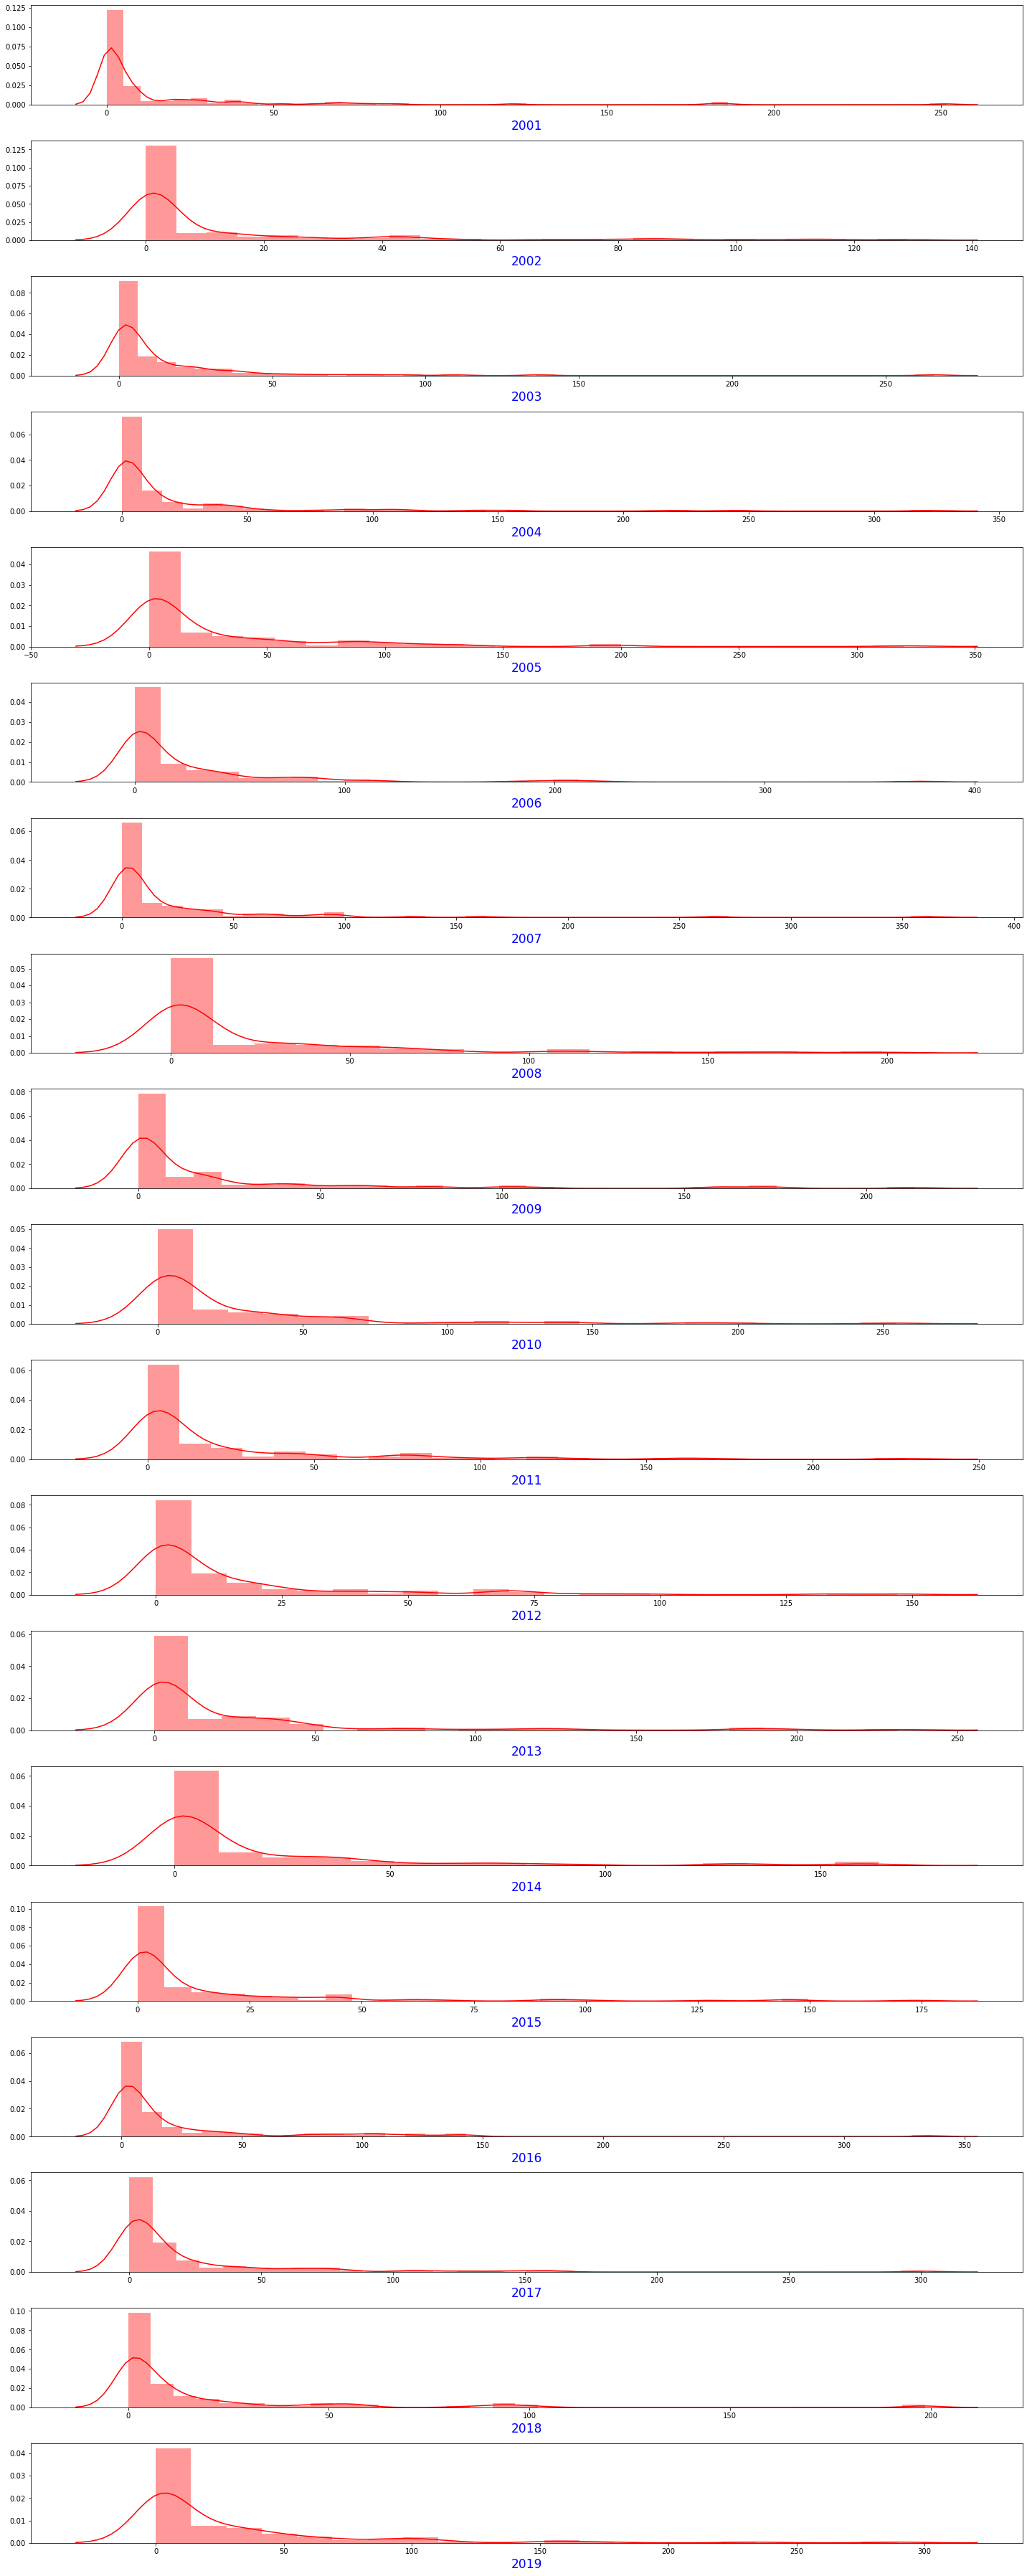

In [10]:
#Histogram for rainfall distribution from 2001 - 2019
df = pune1[(pune1['Month'] == 6) | (pune1['Month'] == 7) | (pune1['Month'] == 8) | (pune1['Month'] == 9)]
fig,ax = plt.subplots(19,1,figsize=(20,50))
j = 2001
for i in range(0,19):
    df1 = df[df['Year'] == j]
    sns.distplot(df1['value'],ax=ax[i],color='red',kde=True)
    ax[i].set_xlabel(j, fontsize=17,c='blue')
    j += 1
    #myFmt = DateFormatter("%d %B")
    #ax[i].xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.show()

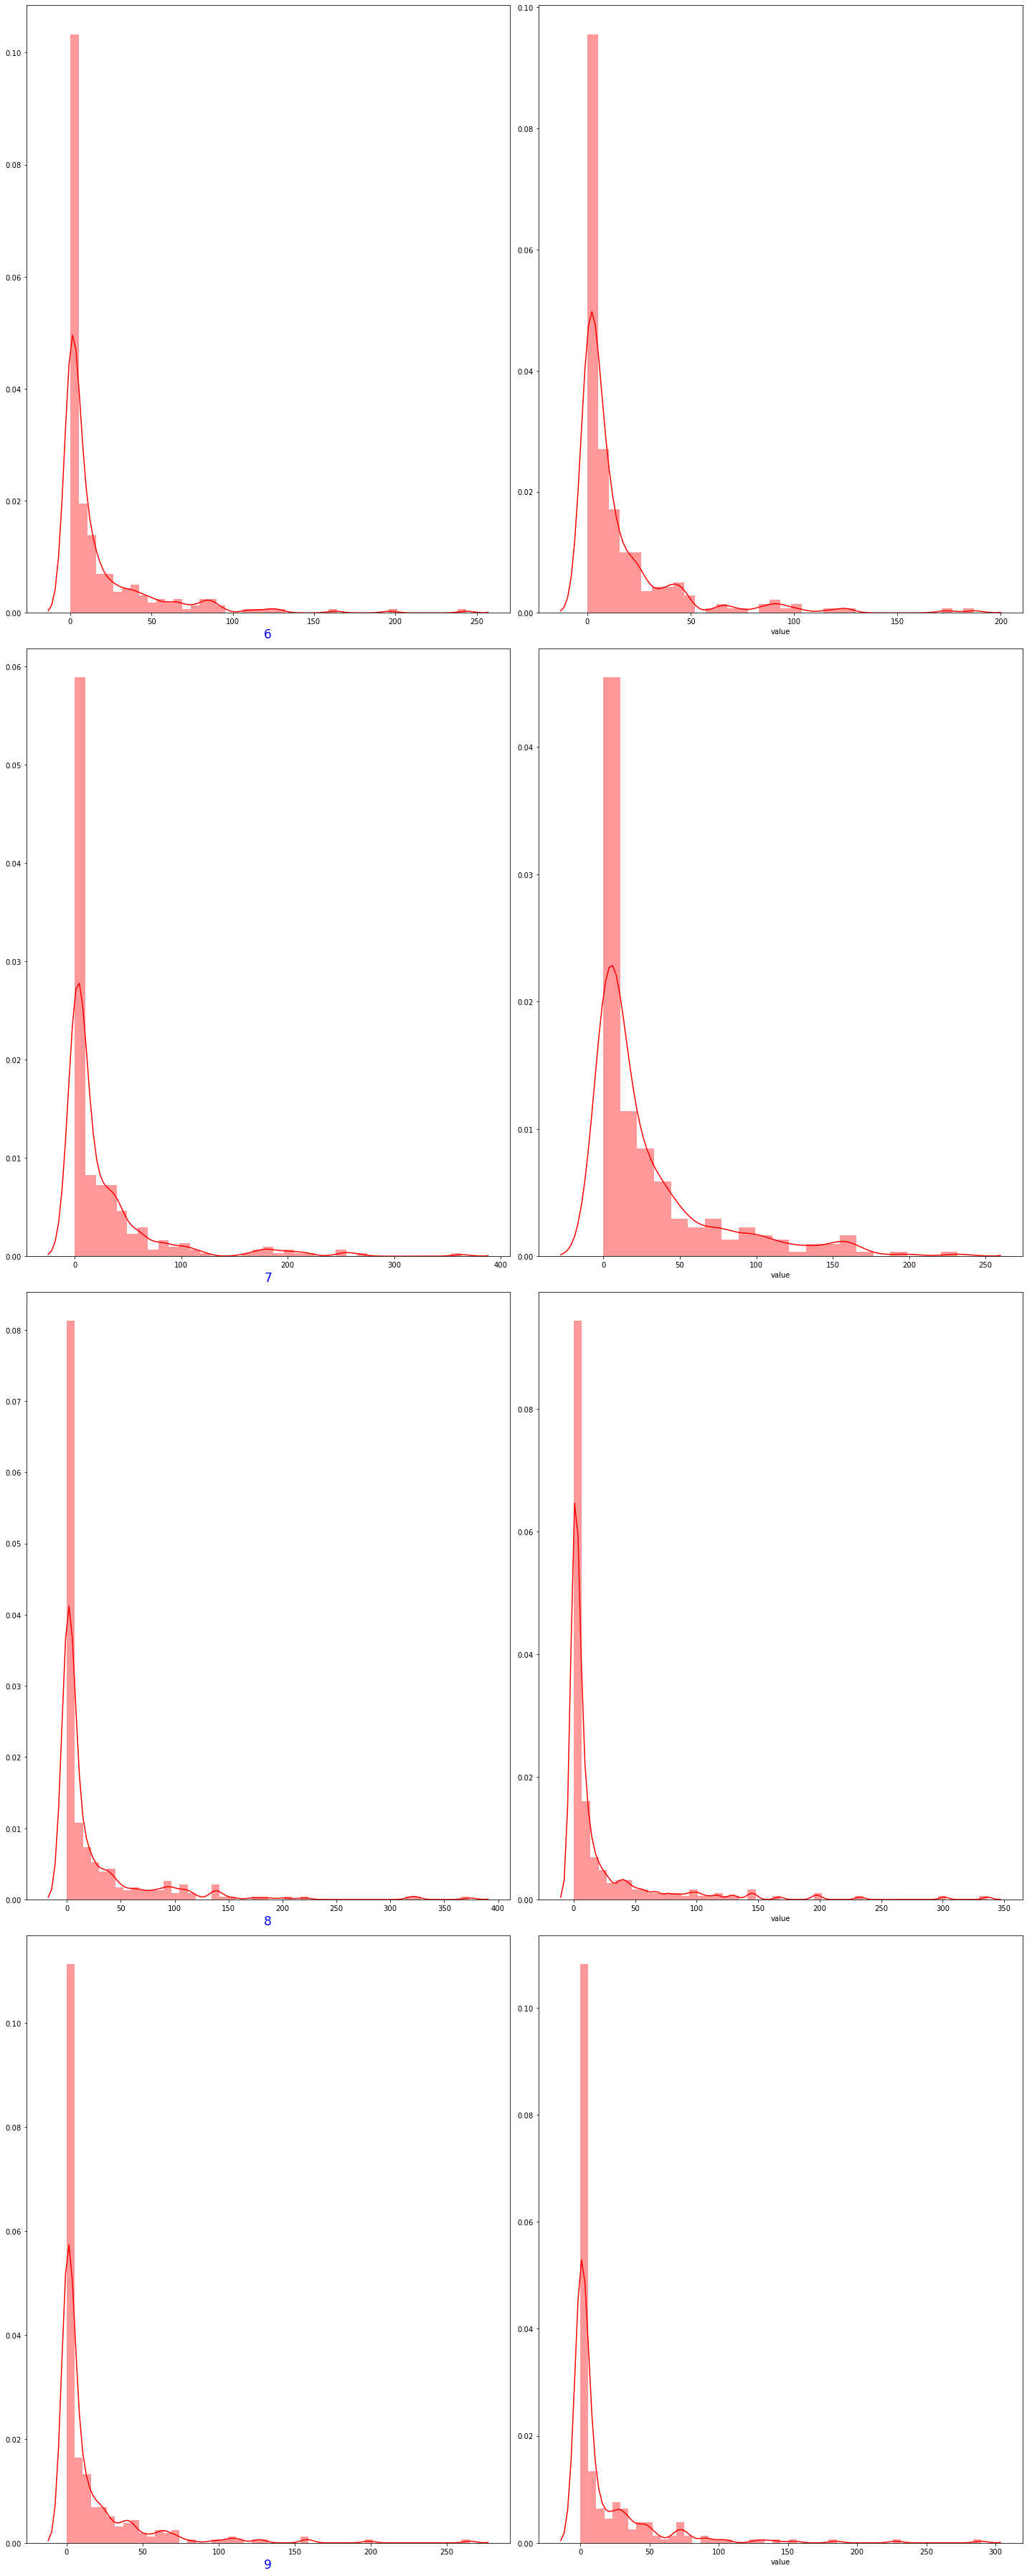

In [11]:
# Monthly Histogram for June to Sept for Column 1 = 2001 - 2010 and Column 2 = 2011 - 2019
df = pune1[(pune1['Year'] == 2001) | (pune1['Year'] == 2002) | (pune1['Year'] == 2003) | (pune1['Year'] == 2004) | (pune1['Year'] == 2005) | (pune1['Year'] == 2006) | (pune1['Year'] == 2007) | (pune1['Year'] == 2008) | (pune1['Year'] == 2009) | (pune1['Year'] == 2010)]
df1 = pune1[(pune1['Year'] == 2011) | (pune1['Year'] == 2012) | (pune1['Year'] == 2013) | (pune1['Year'] == 2014) | (pune1['Year'] == 2015) | (pune1['Year'] == 2016) | (pune1['Year'] == 2017) | (pune1['Year'] == 2018) | (pune1['Year'] == 2019)]
fig,ax = plt.subplots(4,2,figsize=(20,50))
j = 0
for i in [6,7,8,9]:
    df2 = df[df['Month'] == i]
    df3 = df1[df1['Month'] == i]
    sns.distplot(df2['value'],ax=ax[j][0],color='red',kde=True)
    sns.distplot(df3['value'],ax=ax[j][1],color='red',kde=True)
    ax[j][0].set_xlabel(i, fontsize=17,c='blue')
    ax[j][0].set_xlabel(i, fontsize=17,c='blue')
    j += 1
    #myFmt = DateFormatter("%d %B")
    #ax[i].xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.show()

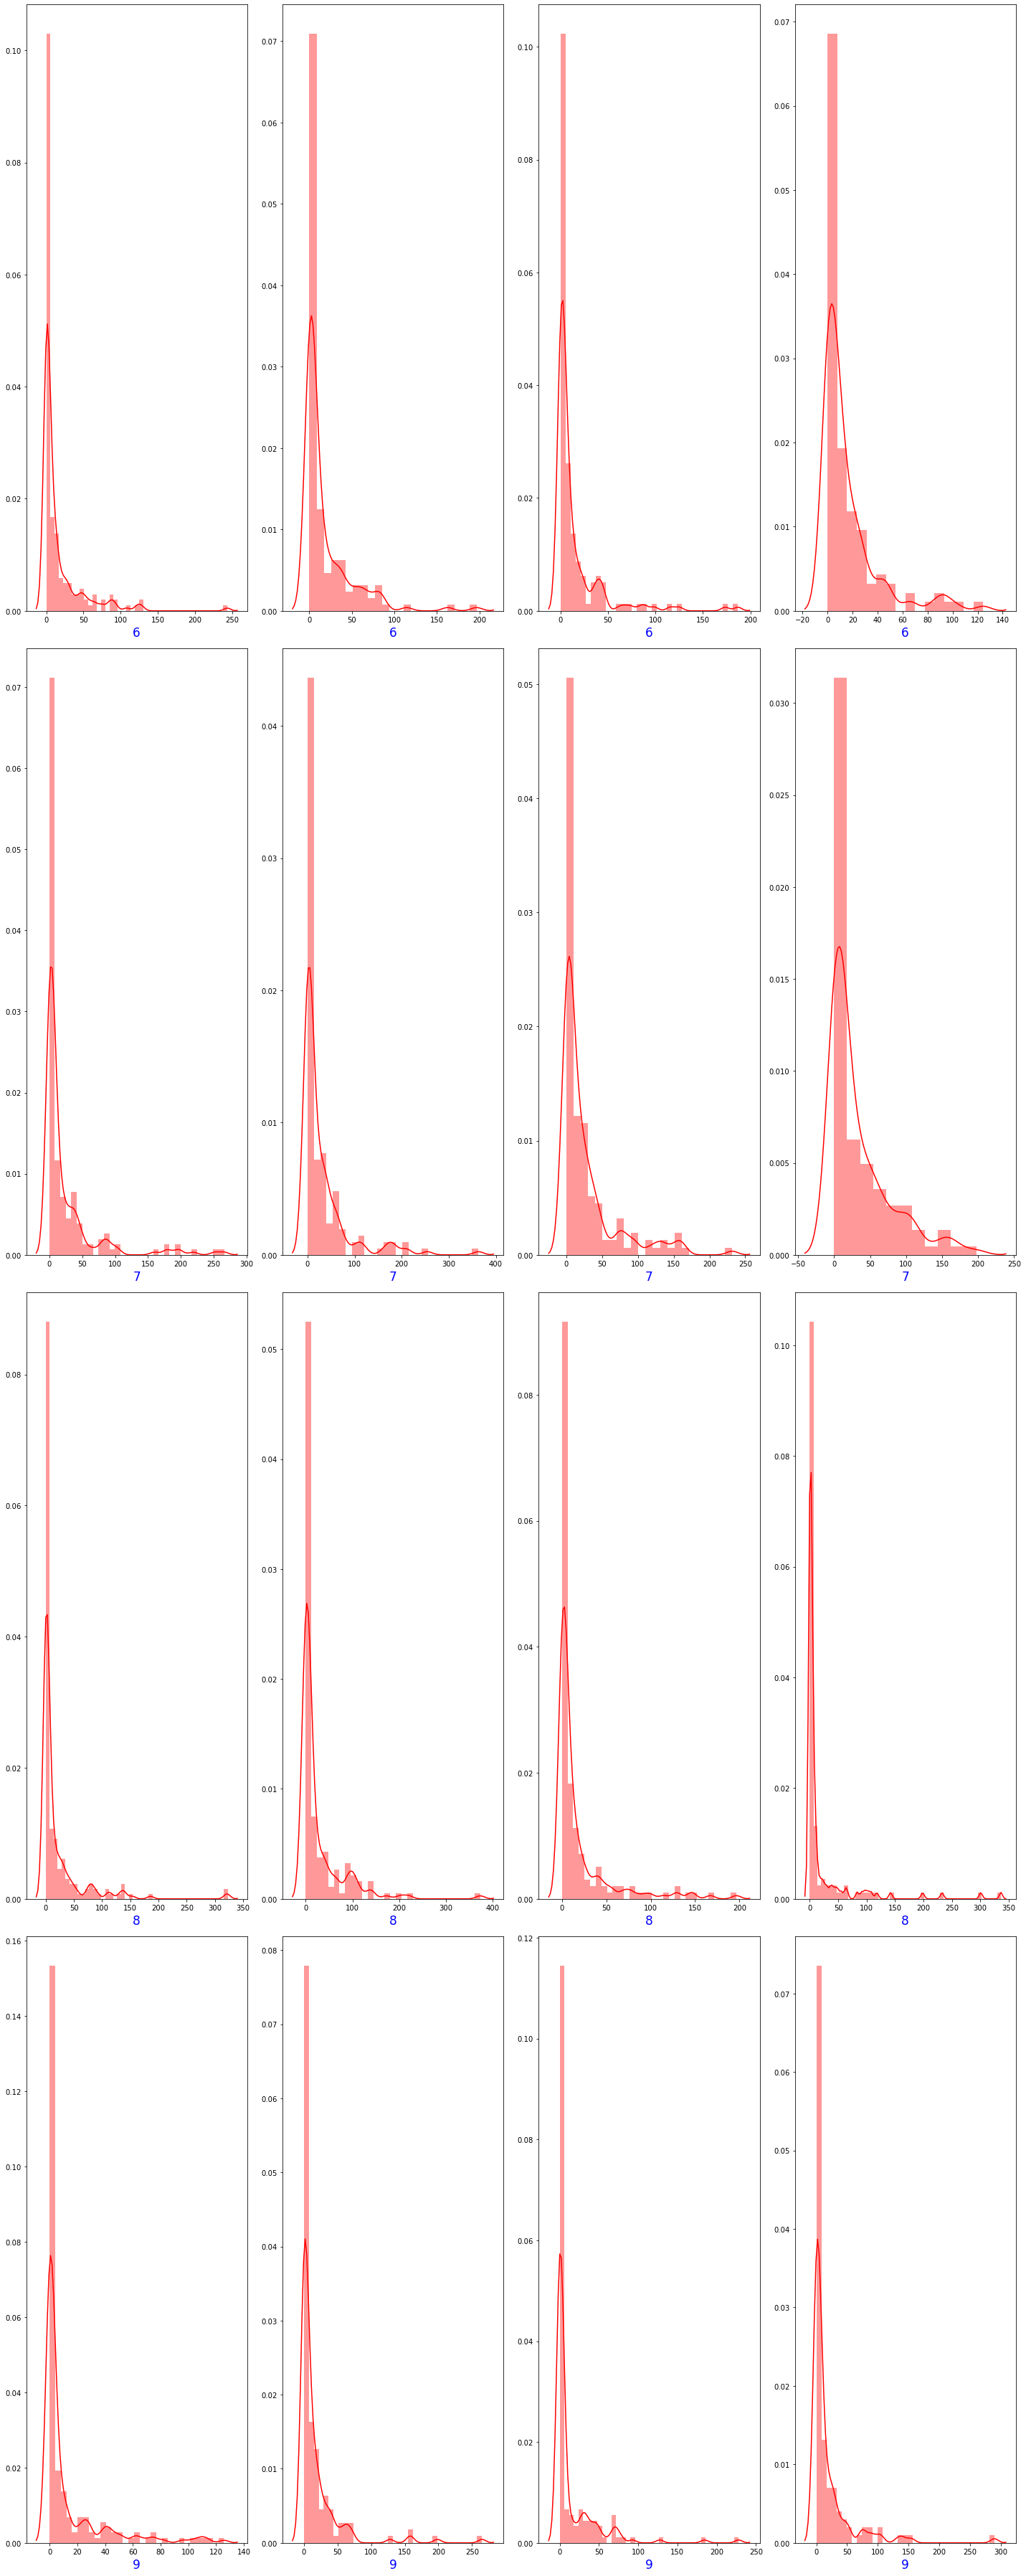

In [12]:
df = pune1[(pune1['Year'] == 2000) | (pune1['Year'] == 2001) | (pune1['Year'] == 2002) | (pune1['Year'] == 2003) | (pune1['Year'] == 2004) | (pune1['Year'] == 2005)]
df1 =  pune1[(pune1['Year'] == 2006) | (pune1['Year'] == 2007) | (pune1['Year'] == 2008) | (pune1['Year'] == 2009) | (pune1['Year'] == 2010)]
df2 = pune1[(pune1['Year'] == 2011) | (pune1['Year'] == 2012) | (pune1['Year'] == 2013) | (pune1['Year'] == 2014) | (pune1['Year'] == 2015) ]
df3 = pune1[(pune1['Year'] == 2016) | (pune1['Year'] == 2017) | (pune1['Year'] == 2018) | (pune1['Year'] == 2019)]
fig,ax = plt.subplots(4,4,figsize=(20,50))
j = 0
for i in [6,7,8,9]:
    df4= df[df['Month'] == i]
    df5= df1[df1['Month'] == i]
    df6= df2[df2['Month'] == i]
    df7= df3[df3['Month'] == i]
    sns.distplot(df4['value'],ax=ax[j][0],color='red',kde=True)
    sns.distplot(df5['value'],ax=ax[j][1],color='red',kde=True)
    sns.distplot(df6['value'],ax=ax[j][2],color='red',kde=True)
    sns.distplot(df7['value'],ax=ax[j][3],color='red',kde=True)
    ax[j][0].set_xlabel(i, fontsize=17,c='blue')
    ax[j][1].set_xlabel(i, fontsize=17,c='blue')
    ax[j][2].set_xlabel(i, fontsize=17,c='blue')
    ax[j][3].set_xlabel(i, fontsize=17,c='blue')
    j += 1
    #myFmt = DateFormatter("%d %B")
    #ax[i].xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.show()